In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [3]:
# Load and inspect the dataset
data_path = "breast-cancer.csv"
cancer_data = pd.read_csv(data_path)

# Remove the 'id' column
if "id" in cancer_data.columns:
    cancer_data.drop(columns="id", inplace=True)

# Encode diagnosis: Malignant=1, Benign=0
cancer_data["diagnosis"] = cancer_data["diagnosis"].map({"M": 1, "B": 0})

# Check for nulls
print("Missing Values:\n", cancer_data.isnull().sum())


Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
# View basic information about the dataset, including data types and non-null counts
print("\nDataset overview:")
print(cancer_data.info())



Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se

In [5]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


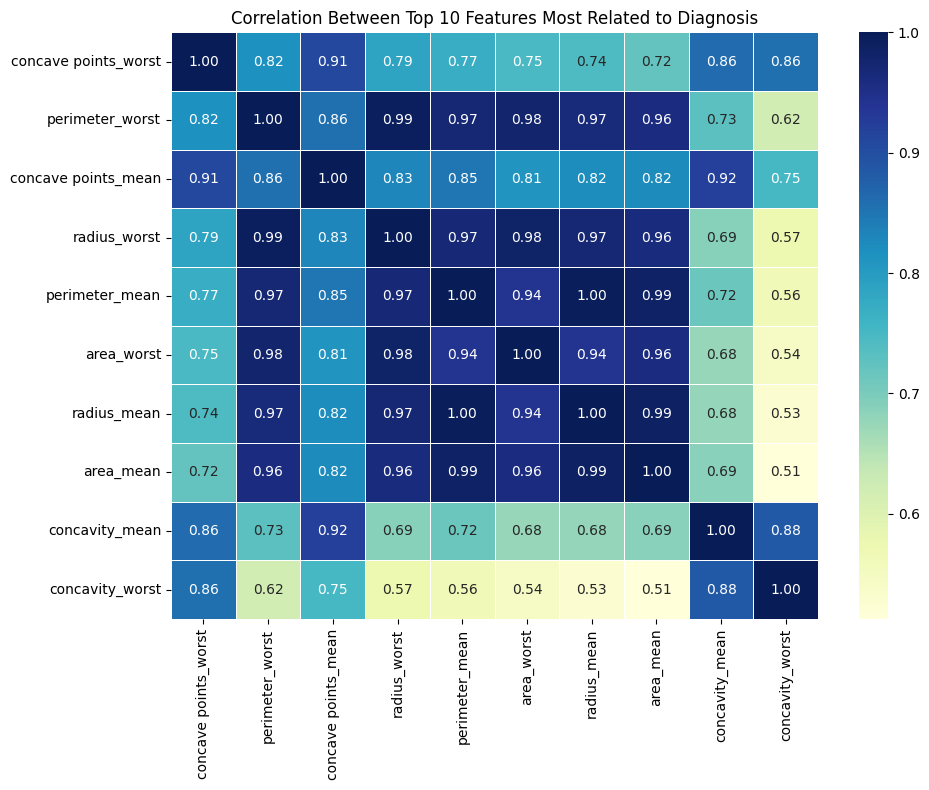

In [6]:
# Calculate correlation matrix
correlation_matrix = cancer_data.corr()

# Get correlations with the target ('diagnosis'), and sort them
cor_target = correlation_matrix["diagnosis"].abs().sort_values(ascending=False)

# Select top 10 most correlated features with 'diagnosis'
top_features = cor_target[1:11].index  # Exclude 'diagnosis' itself

# Create a smaller correlation matrix with just these features
reduced_corr_matrix = cancer_data[top_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Top 10 Features Most Related to Diagnosis")
plt.tight_layout()
plt.show()



Target class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


/tmp/ipython-input-7-1534237332.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=cancer_data, palette="Set2")


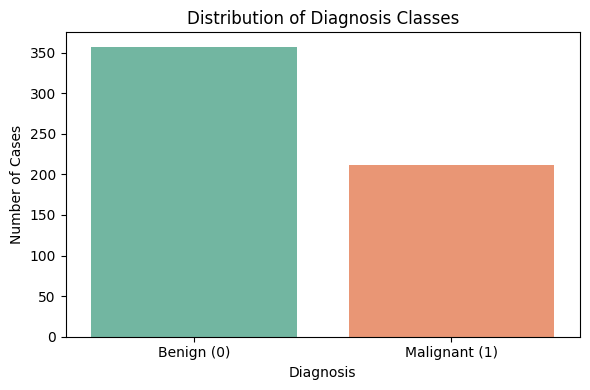


Class Percentages:
Benign: 62.74%
Malignant: 37.26%


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many malignant and benign cases there are
target_distribution = cancer_data["diagnosis"].value_counts()
print("\nTarget class distribution:\n", target_distribution)

# Plot the distribution for better visualization
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis", data=cancer_data, palette="Set2")
plt.title("Distribution of Diagnosis Classes")
plt.xticks([0, 1], ["Benign (0)", "Malignant (1)"])
plt.xlabel("Diagnosis")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# Calculate and print the percentage of each class
total_cases = target_distribution.sum()
benign_percentage = (target_distribution[0] / total_cases) * 100
malignant_percentage = (target_distribution[1] / total_cases) * 100

print(f"\nClass Percentages:\nBenign: {benign_percentage:.2f}%\nMalignant: {malignant_percentage:.2f}%")


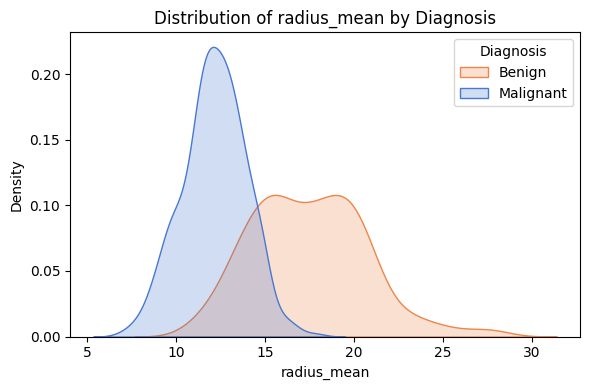

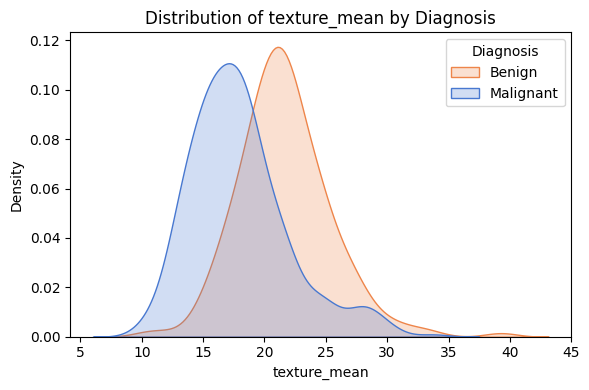

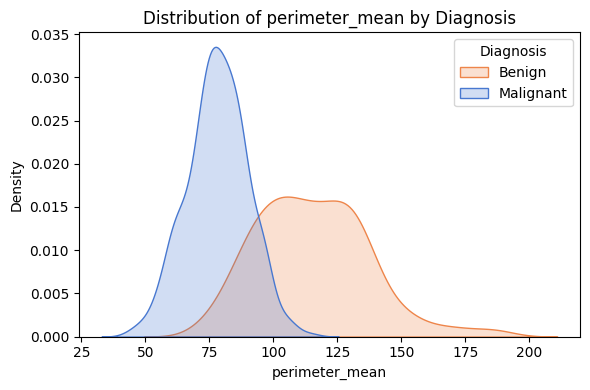

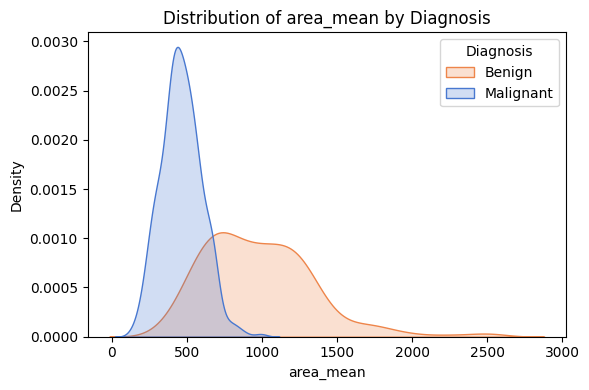

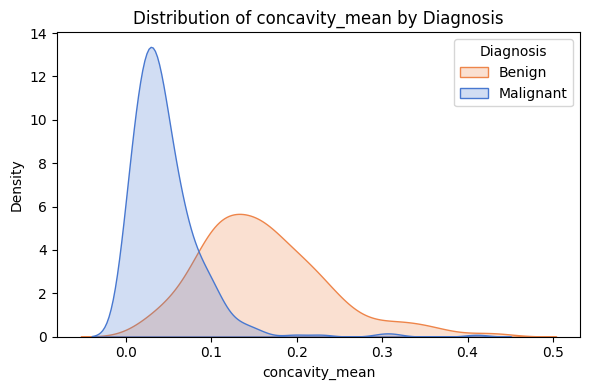

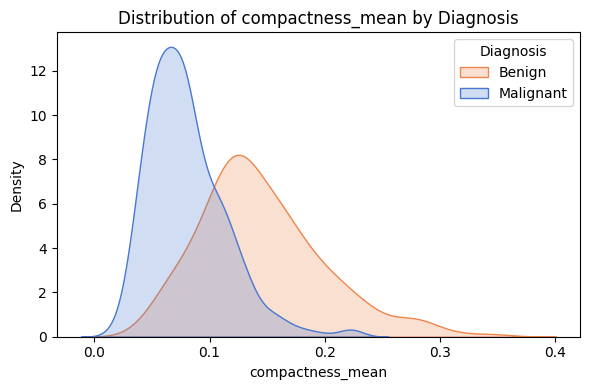

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected important features for visualization
selected_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "concavity_mean", "compactness_mean"]

# Plot each feature's distribution grouped by diagnosis
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=cancer_data, x=feature, hue="diagnosis", fill=True, common_norm=False, palette="muted")
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Diagnosis", labels=["Benign", "Malignant"])
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


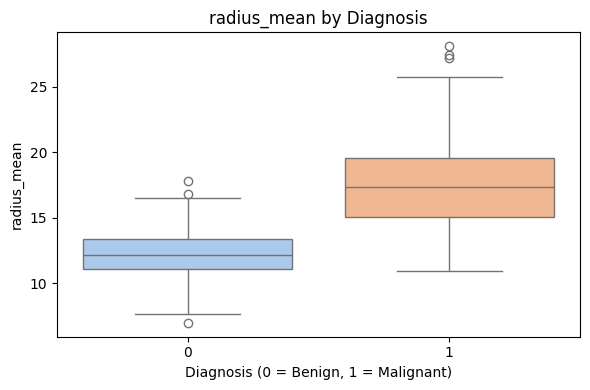

/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


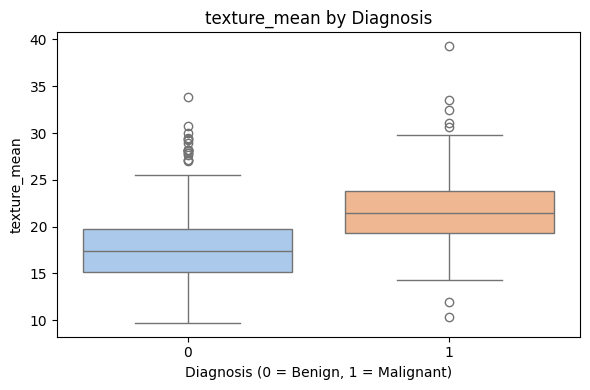

/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


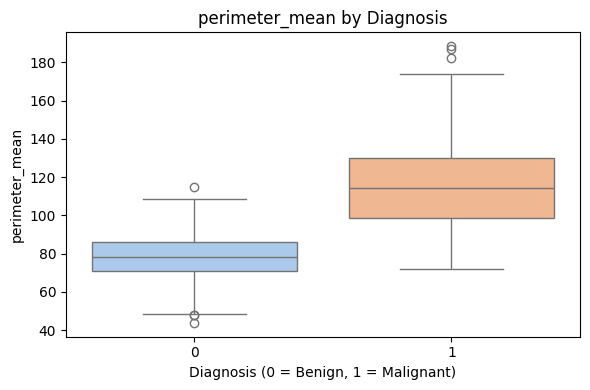

/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


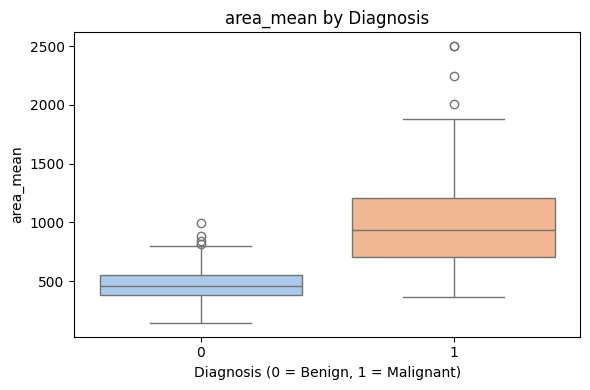

/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


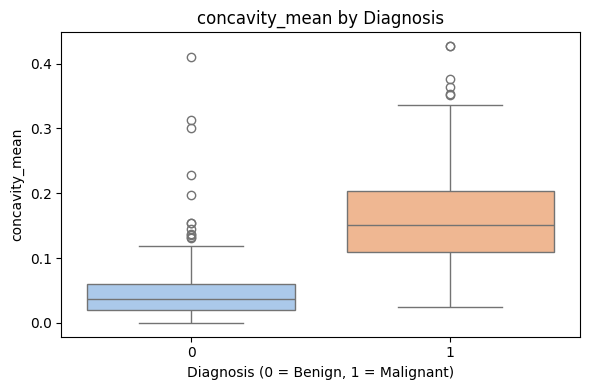

/tmp/ipython-input-9-2882933672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")


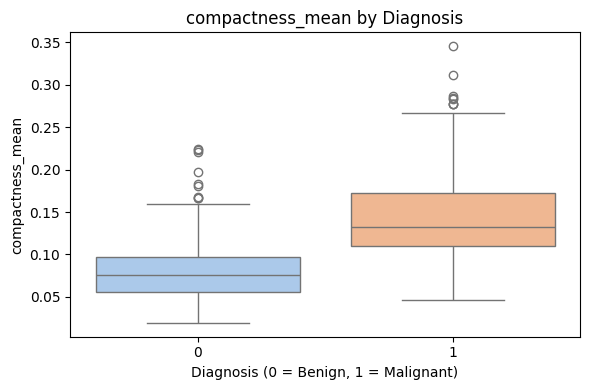

In [9]:
# Create boxplots for selected features
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()



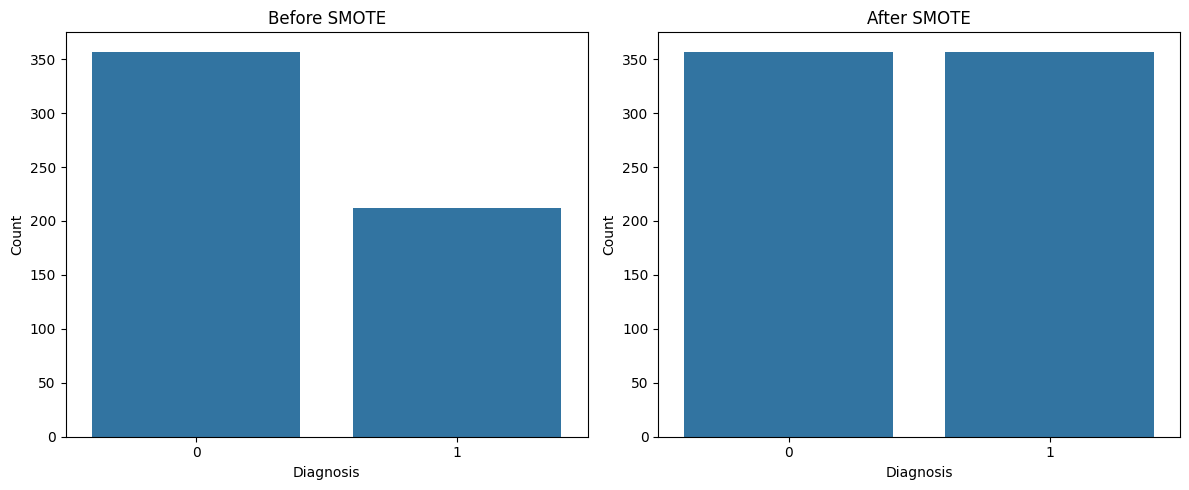

In [10]:
# Step: Prepare for SMOTE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target from cancer_data
X = cancer_data.drop("diagnosis", axis=1)
y = cancer_data["diagnosis"]

# Plot before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [11]:
# Step: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Step-by-step: Train Random Forest model and evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_preds = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_preds))

print("Random Forest - Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest - Confusion Matrix:
[[72  0]
 [ 3 68]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.96      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Random Forest - Accuracy: 0.9790209790209791


Iteration 1, loss = 0.71521366
Iteration 2, loss = 0.56450361
Iteration 3, loss = 0.45595226
Iteration 4, loss = 0.37782721
Iteration 5, loss = 0.31590631
Iteration 6, loss = 0.26688651
Iteration 7, loss = 0.22651464
Iteration 8, loss = 0.19491858
Iteration 9, loss = 0.16700871
Iteration 10, loss = 0.14479172
Iteration 11, loss = 0.12795785
Iteration 12, loss = 0.11514103
Iteration 13, loss = 0.10477377
Iteration 14, loss = 0.09476637
Iteration 15, loss = 0.08675591
Iteration 16, loss = 0.07971759
Iteration 17, loss = 0.07337397
Iteration 18, loss = 0.06787300
Iteration 19, loss = 0.06216838
Iteration 20, loss = 0.05786482
Iteration 21, loss = 0.05397958
Iteration 22, loss = 0.04951290
Iteration 23, loss = 0.04538275
Iteration 24, loss = 0.04200649
Iteration 25, loss = 0.03932118
Iteration 26, loss = 0.03606830
Iteration 27, loss = 0.03291477
Iteration 28, loss = 0.03057306
Iteration 29, loss = 0.02818816
Iteration 30, loss = 0.02565225
Iteration 31, loss = 0.02417292
Iteration 32, los

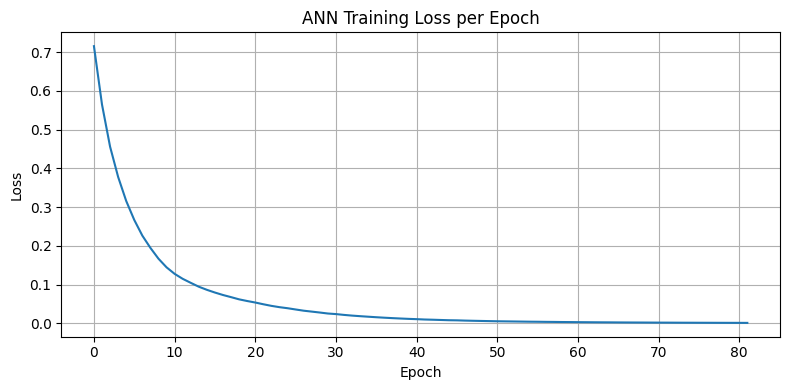

In [13]:
# Step-by-step: Train ANN (MLP) with deeper layers and show loss per epoch
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the ANN model with deep architecture
ann_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Deep layers
    activation='relu',
    solver='adam',
    max_iter=200,        # Number of training epochs
    random_state=42,
    verbose=True         # Print loss per epoch
)

# Train the ANN model
ann_model.fit(X_train_scaled, y_train)

# Predict
ann_preds = ann_model.predict(X_test_scaled)

# Evaluation
print("ANN - Confusion Matrix:")
print(confusion_matrix(y_test, ann_preds))

print("\nANN - Classification Report:")
print(classification_report(y_test, ann_preds))

print("ANN - Accuracy:", accuracy_score(y_test, ann_preds))

# Plot the loss curve
plt.figure(figsize=(8, 4))
plt.plot(ann_model.loss_curve_)
plt.title("ANN Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Step-by-step: Train XGBoost model and evaluate
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, xgb_preds))

print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_preds))


XGBoost - Confusion Matrix:
[[71  1]
 [ 3 68]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.99      0.96      0.97        71

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

XGBoost - Accuracy: 0.972027972027972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


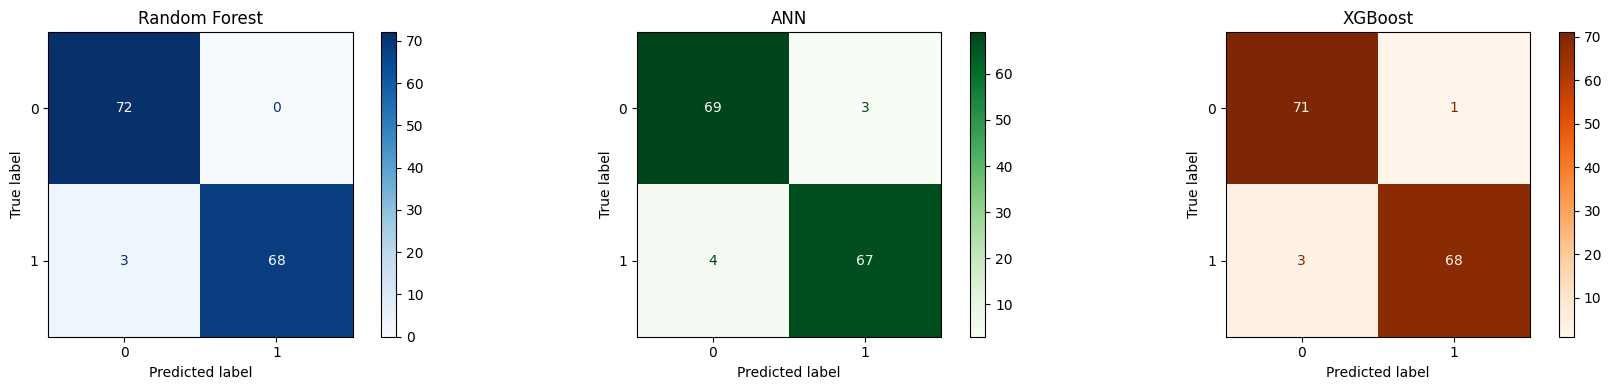

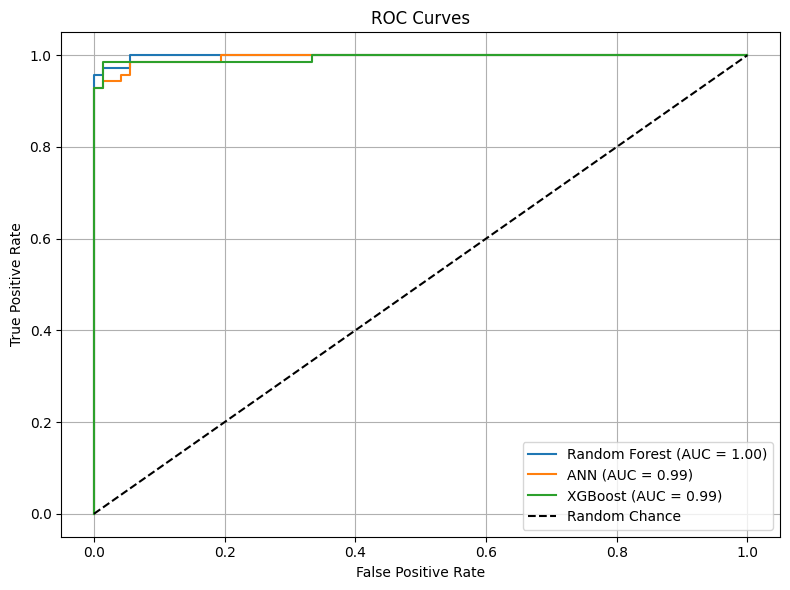

In [15]:
# Plot Confusion Matrices and ROC Curves for all three models
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Prepare predicted probabilities for ROC curves
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
ann_probs = ann_model.predict_proba(X_test_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
ann_auc = auc(ann_fpr, ann_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest")

ConfusionMatrixDisplay.from_estimator(ann_model, X_test_scaled, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("ANN")

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test, ax=axes[2], cmap='Oranges')
axes[2].set_title("XGBoost")

plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(ann_fpr, ann_tpr, label=f'ANN (AUC = {ann_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
rf_grid.fit(X_train_scaled, y_train)

# Best model
best_rf_model = rf_grid.best_estimator_

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
print("Best Random Forest Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9790209790209791
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.96      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Smaller parameter grid to avoid memory issues
xgb_params = {
    'n_estimators': [100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2]
}

# GridSearchCV setup
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
xgb_grid.fit(X_train_scaled, y_train)

# Get best model
best_xgb_model = xgb_grid.best_estimator_

# Predict
y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)

# Output evaluation
print("Best Parameters:", xgb_grid.best_params_)
print(" Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:30:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
 Accuracy: 0.958041958041958
Confusion Matrix:
[[71  1]
 [ 5 66]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.99      0.93      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



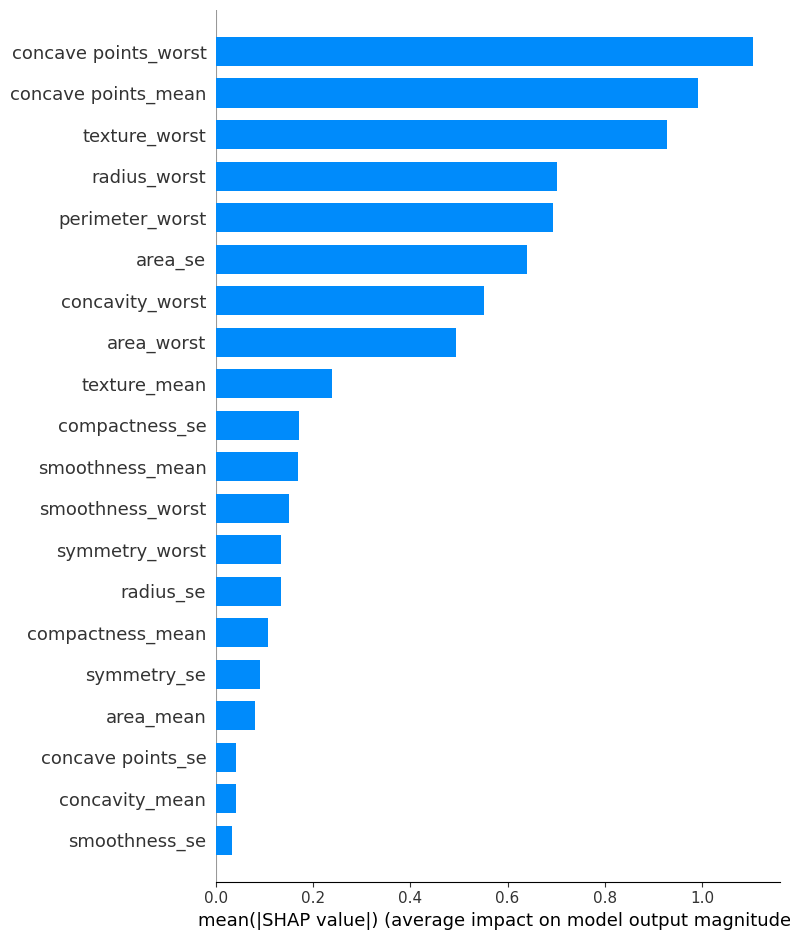

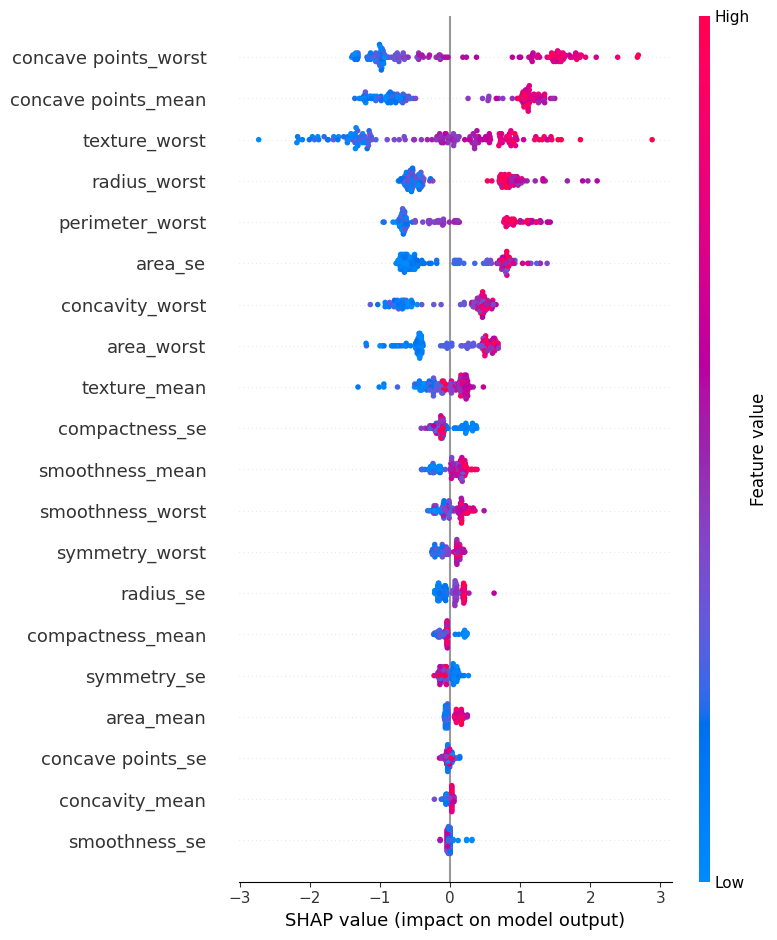

                 Feature  Mean_Abs_SHAP
27  concave points_worst       1.105530
7    concave points_mean       0.991005
21         texture_worst       0.928788
20          radius_worst       0.701774
22       perimeter_worst       0.692799
13               area_se       0.639540
26       concavity_worst       0.550639
23            area_worst       0.493381
1           texture_mean       0.239084
15        compactness_se       0.170959


In [19]:
import shap
import numpy as np
import pandas as pd

# Assume: X_test_scaled already exists and matches column names in X
# Also assume: best_xgb_model is your trained XGBoost model
# And: X is your original DataFrame (with column names)

# Create SHAP explainer
explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values
shap_values = explainer(X_test_scaled)

# Feature importance (bar chart)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")

# Feature effect (dot chart)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# (Optional) DataFrame of SHAP means for reporting
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Abs_SHAP': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print(shap_df.head(10))  # Top 10 important features
